In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'bitbootcamp/HW6_Data.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,date,ps_level,ps_innov,MKTRF,RF,Losers,2,3,4,5,6,7,8,9,Winners
0,19620131,NaN,NaN,-0.0386,0.0024,-0.0392,-0.0269,-0.0365,-0.0229,0.0049,-0.0446,-0.0278,-0.0354,-0.0571,-0.0631
1,19620228,0.008556,NaN,0.0175,0.0020,-0.0070,0.0100,0.0140,0.0182,0.0384,0.0343,0.0390,0.0024,0.0053,0.0181
2,19620330,0.013707,NaN,-0.0067,0.0020,-0.0085,-0.0233,-0.0068,-0.0046,-0.0020,0.0005,-0.0073,-0.0004,0.0085,-0.0227
3,19620430,-0.009075,0.006259,-0.0657,0.0022,-0.0851,-0.0935,-0.0835,-0.0603,-0.0610,-0.0421,-0.0966,-0.0522,-0.0533,-0.0436
4,19620531,-0.190133,-0.148735,-0.0871,0.0024,-0.1111,-0.0842,-0.0852,-0.0775,-0.0893,-0.0727,-0.1007,-0.0761,-0.0745,-0.1083


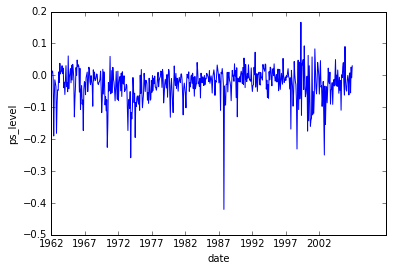

In [20]:
plt.plot(range(len(df['ps_level'])),df['ps_level'])
plt.ylabel('ps_level')
plt.xlabel('date')
plt.xticks(np.arange(0,540,60),map(lambda x: 1962+x/12,np.arange(0,540,60)))
plt.savefig('bitbootcamp/HW5_g1.png')
plt.show()

In [19]:
df.sort_values(by='ps_level').head(2)

,date,ps_level,ps_innov,MKTRF,RF,Losers,2,3,4,5,6,7,8,9,Winners
309,19871030,-0.420270,-0.357936,-0.2314,0.0060,-0.2379,-0.1577,-0.1556,-0.1864,-0.2148,-0.2378,-0.2429,-0.2046,-0.2627,-0.2674
142,19731130,-0.258337,-0.214172,-0.1264,0.0056,-0.2313,-0.2243,-0.1983,-0.1758,-0.1133,-0.1372,-0.0958,-0.1086,-0.0920,-0.0928


In [26]:
temp = df['ps_level'].tolist()
temp2 = []
temp2.append(0)
for item in temp[1:]:
    temp2.append(item-temp2[len(temp2)-1])

In [31]:
np.mean(df['MKTRF'])

0.004574074074074078

In [33]:
df['f'] = df['MKTRF'] - np.mean(df['MKTRF'])

In [36]:
from pandas.stats.api import ols

In [39]:
results = []
for col in ['Losers','2','3','4','5','6','7','8','9','Winners']:
    res = ols(y=df[col], x=df[['f','ps_innov']])
    results.append(res)

In [40]:
results

[
 -------------------------Summary of Regression Analysis-------------------------
 
 Formula: Y ~ <f> + <ps_innov> + <intercept>
 
 Number of Observations:         537
 Number of Degrees of Freedom:   3
 
 R-squared:         0.6592
 Adj R-squared:     0.6580
 
 Rmse:              0.0429
 
 F-stat (2, 534):   516.5206, p-value:     0.0000
 
 Degrees of Freedom: model 2, resid 534
 
 -----------------------Summary of Estimated Coefficients------------------------
       Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
 --------------------------------------------------------------------------------
              f     1.3577     0.0453      29.99     0.0000     1.2690     1.4464
       ps_innov    -0.0201     0.0431      -0.47     0.6408    -0.1047     0.0644
      intercept     0.0015     0.0019       0.82     0.4154    -0.0021     0.0051
 ---------------------------------End of Summary---------------------------------,
 
 -------------------------Summary of 

In [41]:
df['diff'] = df['Winners'] - df['Losers']
res = ols(y=df['diff'],x=df[['f','ps_innov']])
print res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <f> + <ps_innov> + <intercept>

Number of Observations:         537
Number of Degrees of Freedom:   3

R-squared:         0.0123
Adj R-squared:     0.0086

Rmse:              0.0627

F-stat (2, 534):     3.3275, p-value:     0.0366

Degrees of Freedom: model 2, resid 534

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             f    -0.1649     0.0661      -2.49     0.0129    -0.2945    -0.0354
      ps_innov     0.0203     0.0630       0.32     0.7473    -0.1032     0.1438
     intercept     0.0146     0.0027       5.42     0.0000     0.0093     0.0199
---------------------------------End of Summary---------------------------------



In [42]:
df.describe()

,date,ps_level,ps_innov,MKTRF,RF,Losers,2,3,4,5,6,7,8,9,Winners,f,diff
count,5.400000e+02,539.000000,5.370000e+02,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02,540.000000
mean,1.984068e+07,-0.027256,3.910614e-11,0.004574,0.004619,0.001504,0.007018,0.008184,0.008724,0.007699,0.008772,0.009052,0.011229,0.012140,0.016034,-4.556862e-18,0.014529
std,1.299926e+05,0.051715,4.632095e-02,0.044064,0.002251,0.073209,0.058869,0.050618,0.046528,0.043216,0.044483,0.043804,0.044317,0.048118,0.061692,4.406354e-02,0.062806
min,1.962013e+07,-0.420270,-3.579363e-01,-0.231400,0.000600,-0.237900,-0.224300,-0.198300,-0.186400,-0.214800,-0.237800,-0.242900,-0.204600,-0.262700,-0.267400,-2.359741e-01,-0.421800
25%,1.973040e+07,-0.049269,-2.050790e-02,-0.021825,0.003100,-0.037400,-0.026150,-0.018500,-0.018325,-0.016825,-0.015675,-0.016550,-0.015175,-0.016275,-0.020350,-2.639907e-02,-0.010550
50%,1.984068e+07,-0.019227,5.943534e-03,0.007750,0.004300,0.000400,0.006300,0.006900,0.008100,0.008600,0.011000,0.010250,0.012500,0.016450,0.017100,3.175926e-03,0.017600
75%,1.995095e+07,0.003792,2.561623e-02,0.033725,0.005700,0.039275,0.039700,0.034125,0.033425,0.033350,0.036050,0.037200,0.038025,0.041725,0.054575,2.915093e-02,0.048325
max,2.006123e+07,0.166485,2.309100e-01,0.160500,0.013500,0.357000,0.260000,0.199100,0.203500,0.134900,0.166400,0.189000,0.189300,0.218300,0.230300,1.559259e-01,0.259000


In [48]:
bm = [1.3577,1.1364,0.9851,0.9383,0.8869,0.9022,0.8872,0.9099 ,0.9689,1.1928]
lm = [-0.0201,-0.0136,-0.0029,-0.0042,0.0227, 0.0604 ,0.0531 ,0.0293 ,0.0395,0.0002  ]
avg = map(lambda x: np.mean(df[x]),['Losers','2','3','4','5','6','7','8','9','Winners'])

In [53]:
newdf = pd.DataFrame()
newdf['bm'] = bm
newdf['lm'] = lm
newdf['avg'] = avg

In [54]:
ols(y=newdf['avg'],x=newdf[['bm','lm']])


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <bm> + <lm> + <intercept>

Number of Observations:         10
Number of Degrees of Freedom:   3

R-squared:         0.1248
Adj R-squared:    -0.1252

Rmse:              0.0040

F-stat (2, 7):     0.4993, p-value:     0.6270

Degrees of Freedom: model 2, resid 7

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
            bm    -0.0035     0.0121      -0.29     0.7785    -0.0273     0.0202
            lm     0.0301     0.0678       0.44     0.6705    -0.1028     0.1630
     intercept     0.0121     0.0132       0.92     0.3885    -0.0137     0.0380
---------------------------------End of Summary---------------------------------

In [58]:
pred = []
for i in range(len(bm)):
    pred.append(0.0121-0.0035*bm[i]+0.0301*lm[i])

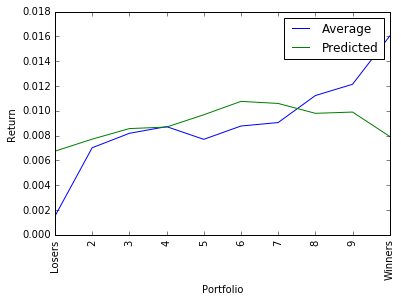

In [66]:
plt.plot(range(10),newdf['avg'],range(10),pred)
plt.ylabel('Return')
plt.xlabel('Portfolio')
plt.xticks(range(10),['Losers','2','3','4','5','6','7','8','9','Winners'],rotation='vertical')
plt.legend(['Average','Predicted'])
plt.savefig('bitbootcamp/HW5_g2.png')